In [1]:
import numpy as np
import pandas as pd

In [2]:
import pickle
import os

In [3]:
data_dir = r'C:\Users\a0105\Desktop\DSC\ddd\preprocessing/'

filenames = os.listdir(data_dir)
print(filenames)

['feed.rds', 'usbeer_merge.pkl', '가축사육현황merge.pkl', '경제성장률merge.pkl', '관측정보_merge.pkl', '수입현황merge.pkl', '축산물_공휴일.pkl', '축산물_시계열 데이터로 변환(전국).pkl']


In [45]:
with open(data_dir+'usbeer_merge.pkl', 'rb') as f:
    usbeef = pickle.load(f)

with open(data_dir+'가축사육현황merge.pkl', 'rb') as f:
    livestock = pickle.load(f)
    
with open(data_dir+'경제성장률merge.pkl', 'rb') as f:
    economic = pickle.load(f)
    
with open(data_dir+'관측정보_merge.pkl', 'rb') as f:
    weather = pickle.load(f)

with open(data_dir+'수입현황merge.pkl', 'rb') as f:
    import_df = pickle.load(f)
    
with open(data_dir+'축산물_공휴일.pkl', 'rb') as f:
    holiday = pickle.load(f)
    
with open(data_dir+'축산물_시계열 데이터로 변환(전국).pkl', 'rb') as f:
    price_ts = pickle.load(f)

In [46]:
print(usbeef.shape)
print(livestock.shape)
print(economic.shape)
print(weather.shape)
print(import_df.shape)
print(holiday.shape)
print(price_ts.shape)

(298, 3)
(298, 21)
(298, 16)
(298, 11)
(298, 8)
(298, 7)
(298, 5)


In [47]:
# livestock 주간날짜 칼럼 -> datetime형태로 바꿔주기
livestock['주간날짜'] = pd.to_datetime(livestock['주간날짜'])

### usbeef 가격 데이터+ 한우가격(y값)

In [48]:
usbeef.head
print(usbeef.columns)

Index(['주간날짜', '한우 평균경매 금액_주간평균', 'price'], dtype='object')


In [49]:
# price -> 생산량_주간평균으로 대체
usbeef = usbeef.rename(columns={'price':'미국소_생산량(가격화한값)'})

In [50]:
del usbeef['한우 평균경매 금액_주간평균']

In [51]:
# 한우 평균경매금액_주간평균 소숫점 2째자리까지만 남기기
usbeef_df = usbeef.copy()
usbeef_df.head(2)

,주간날짜,미국소_생산량(가격화한값)
0,2013-01-06,226130.0
1,2013-01-13,226130.0


### livestock(가축사육현황) 데이터 + 한우가격(y값)

In [58]:
# 모든 칼럼 다 보기
pd.options.display.max_columns = 22
livestock.head()

,연도,월,마리수,번식우,1세미만(암),1세미만(수),1~2세(암),1~2세(수),2세이상(암),2세이상(수),날짜,번식우 아닌 소,"마리 수 중 1세 미만(암,수) 제외","번식우 아닌 소 중 1세 미만(암,수) 제외",1~2세(모든 소),분기,주간날짜,한우 평균경매 금액_주간평균,돼지 탕박 경매 금액_주간평균,year,month
0,2013,3,2966,1580,396,470,409,479,996,216,2013-3,1386,2100,520,888,1,2013-01-06,13875.600000,3044.800000,2013,1
1,2013,3,2966,1580,396,470,409,479,996,216,2013-3,1386,2100,520,888,1,2013-01-13,13213.333333,2984.000000,2013,1
2,2013,3,2966,1580,396,470,409,479,996,216,2013-3,1386,2100,520,888,1,2013-01-20,12588.833333,2904.000000,2013,1
3,2013,3,2966,1580,396,470,409,479,996,216,2013-3,1386,2100,520,888,1,2013-01-27,12323.833333,2959.666667,2013,1
4,2013,3,2966,1580,396,470,409,479,996,216,2013-3,1386,2100,520,888,1,2013-02-03,12325.166667,2862.833333,2013,2


In [56]:
# 필요한 칼럼
columns = ['주간날짜','번식우 아닌 소 중 1세 미만(암,수) 제외','1~2세(모든 소)',
          '한우 평균경매 금액_주간평균','돼지 탕박 경매 금액_주간평균']

livestock_df = livestock[columns]
livestock_df['한우 평균경매 금액_주간평균'] = livestock_df['한우 평균경매 금액_주간평균'].round(2)
livestock_df['돼지 탕박 경매 금액_주간평균'] = livestock_df['돼지 탕박 경매 금액_주간평균'].round(2)


C:\Users\a0105\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\a0105\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [57]:
livestock_df.head()

,주간날짜,"번식우 아닌 소 중 1세 미만(암,수) 제외",1~2세(모든 소),한우 평균경매 금액_주간평균,돼지 탕박 경매 금액_주간평균
0,2013-01-06,520,888,13875.60,3044.80
1,2013-01-13,520,888,13213.33,2984.00
2,2013-01-20,520,888,12588.83,2904.00
3,2013-01-27,520,888,12323.83,2959.67
4,2013-02-03,520,888,12325.17,2862.83


### economic(경제성장률) 데이터 + 한우가격(y값)

In [59]:
economic.head()

,연도,국내총생산(GDP)(당해년 가격) (10억US$),1인당 GDP(당해년 가격) (달러),GDP 성장률 (%),수출 (100만달러),수입 (100만달러),총인구 (천명),실업률 (%),소비자물가지수 (2010=100),조강생산량 (1000M/T),인터넷 이용률 (%),주간날짜,한우 평균경매 금액_주간평균,돼지 탕박 경매 금액_주간평균,year,month
0,2013.0,1370,27178,3,559632,515586,50429,3,98,66061,84,2013-01-06,13875.600000,3044.800000,2013,1
1,2013.0,1370,27178,3,559632,515586,50429,3,98,66061,84,2013-01-13,13213.333333,2984.000000,2013,1
2,2013.0,1370,27178,3,559632,515586,50429,3,98,66061,84,2013-01-20,12588.833333,2904.000000,2013,1
3,2013.0,1370,27178,3,559632,515586,50429,3,98,66061,84,2013-01-27,12323.833333,2959.666667,2013,1
4,2013.0,1370,27178,3,559632,515586,50429,3,98,66061,84,2013-02-03,12325.166667,2862.833333,2013,2


- <소>
    - [양의 상관관계]
        * 국내총생산 0.58 
        * 1인당 gdp 0.55  
        * 총인구 0.79 
        * 소비자물가지수 0.71  
        * 인터넷이용률 0.77  
        * 돼지탕박가격 0.46

    - [음의 상관관계]
        * gdp성장률 -0.59  
        * 수입 -0.53  


- <돼지>- 소와의 가격관계
    - [양의 상관관계]
        * 한우가격 0.46

In [60]:
# 필요한 칼럼 
columns = ['주간날짜','수출 (100만달러)','수입 (100만달러)','소비자물가지수 (2010=100)']

economic_df = economic[columns]
economic_df.head(2)

,주간날짜,수출 (100만달러),수입 (100만달러),소비자물가지수 (2010=100)
0,2013-01-06,559632,515586,98
1,2013-01-13,559632,515586,98


### import_df(수입소고기 수입현황) 데이터 + 한우가격(y값)

In [61]:
import_df.columns

Index(['주간날짜', '한우 평균경매 금액_주간평균', '돼지 탕박 경매 금액_주간평균', 'year', 'month',
       'frozen', 'refrigeration', 'total'],
      dtype='object')

In [62]:
# 필요한 칼럼 
columns = ['주간날짜','total']

import_df = import_df[columns]
import_df.head(2)

,주간날짜,total
0,2013-01-06,28623
1,2013-01-13,28623


In [63]:
# total 칼럼명 바꾸기
import_df = import_df.rename(columns={'total':'수입소고기_총량'})
import_df.head(2)

,주간날짜,수입소고기_총량
0,2013-01-06,28623
1,2013-01-13,28623


### holiday(축산물 공휴일) 데이터+한우가격(y값)

In [64]:
holiday.columns

Index(['주간날짜', '한우 평균경매 금액_주간평균', '돼지 탕박 경매 금액_주간평균', 'year', 'month', '날짜',
       '명절유무'],
      dtype='object')

In [65]:
# 필요없는 칼럼들 : year, month, 날짜
columns = ['주간날짜','명절유무']

holiday_df = holiday[columns]
holiday_df.head(2)

,주간날짜,명절유무
0,2013-01-06,0
1,2013-01-13,0


---

### weather(날씨 관측 데이터) - EDA 더 필요!?

In [37]:
# year, month 칼럼제거
weather_df = weather.drop(['year','month'], axis=1)
weather_df.head(2)

,주간날짜,한우 평균경매 금액_주간평균,돼지 탕박 경매 금액_주간평균,평균기온,최저기온,최고기온,평균지면온도,최소상대습도(%),평균상대습도(%)
0,2013-01-06,13875.600000,3044.8,-0.3,-4.6,5.4,-2.5,16.0,29.6
1,2013-01-13,13213.333333,2984.0,1.4,-2.2,6.1,0.0,30.0,49.6


In [38]:
weather_df[['한우 평균경매 금액_주간평균', '돼지 탕박 경매 금액_주간평균']] = weather_df[['한우 평균경매 금액_주간평균', '돼지 탕박 경매 금액_주간평균']].round(2)
weather_df.head(2)

,주간날짜,한우 평균경매 금액_주간평균,돼지 탕박 경매 금액_주간평균,평균기온,최저기온,최고기온,평균지면온도,최소상대습도(%),평균상대습도(%)
0,2013-01-06,13875.60,3044.8,-0.3,-4.6,5.4,-2.5,16.0,29.6
1,2013-01-13,13213.33,2984.0,1.4,-2.2,6.1,0.0,30.0,49.6


---

## 데이터 병합

- 우선 더 EDA가 진행되지 않은 관측데이터(weather_df변수)인 상태에서 병합해봄
- 향후 관측데아터의 추가적인 EDA 실시 후 feature selection 필요

In [97]:
from functools import reduce

In [98]:
dfs = [usbeef_df, livestock_df, economic_df, import_df,holiday_df]

df_final = reduce(lambda left, right: pd.merge(left, right, on='주간날짜'), dfs)

In [262]:
df_final.head()

,주간날짜,미국소_생산량(가격화한값),"번식우 아닌 소 중 1세 미만(암,수) 제외",1~2세(모든 소),한우 평균경매 금액_주간평균,돼지 탕박 경매 금액_주간평균,수출 (100만달러),수입 (100만달러),소비자물가지수 (2010=100),수입소고기_총량,명절유무
0,2013-01-06,226130.0,520,888,13875.60,3044.80,559632,515586,98,28623,0
1,2013-01-13,226130.0,520,888,13213.33,2984.00,559632,515586,98,28623,0
2,2013-01-20,226130.0,520,888,12588.83,2904.00,559632,515586,98,28623,0
3,2013-01-27,226130.0,520,888,12323.83,2959.67,559632,515586,98,28623,1
4,2013-02-03,187340.0,520,888,12325.17,2862.83,559632,515586,98,18241,1


# 상관관계

C:\Users\a0105\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\a0105\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


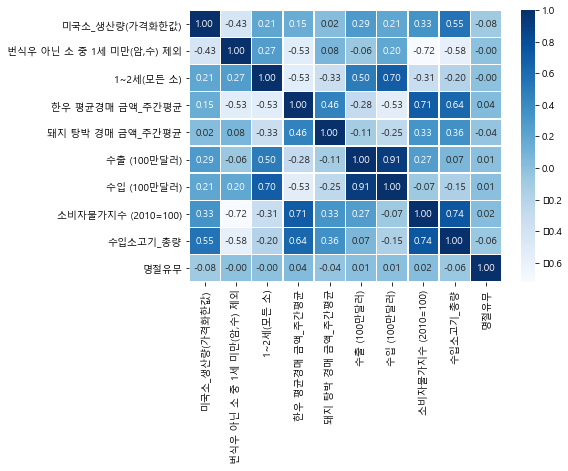

In [268]:

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

corr_data = df_final.drop(["주간날짜"], axis=1)
corr = corr_data.corr()

plt.figure(figsize=(7,5))

sns.heatmap(data = corr, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

In [277]:
df_final.to_pickle('전체merge.pkl')